---
---
# **ANÁLISIS Y VISUALIZACIÓN DE DATOS**

![](./facultad_de_ingeniera_y_tecnologa_uss_logo.jpeg)

**Software para Data Science II - Magíster en Data Science - Facultad de Ingeniería, Arquitectura y Diseño - Universidad San Sebastián**

**Docente:** Paulette N. Reyes Baeza

**Autor:** Gonzalo Daniel Cayunao Erices

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github del Proyecto](https://github.com/gonzakayunawel/casas_usadas_chile_analysis)

---
---

# **1. DESCRIPCIÓN DEL DATASET**

## **Valor Casas Usadas, Chile, RM, 18/07/2023**
Avisos de venta de casas de la Region Metropolitana, Santiago

![](./dataset-cover.jpg)

### **Sobre el DataSet**
Datos extraídos usando la técnica de *Web Scraping* desde el sitio web https://chilepropiedades.cl/

Este dataset solo contiene CASAS en venta. No incluye departamentos o terrenos.

Al utilizar *Web Scraping* es muy posible que hayan avisos cuya información fue ingresada incorrectamente. ej: Una casa con 100 km2 de terreno.

### **Contenidos**
Este dataset contiene 12 columnas

- Price_CLP: Precio de casa en pesos chilenos (CLP)
- Price_UF: Precio de casa en unidades de fomento (UF)
- Price_USD: Precio de casa en dolares americanos (USD)
- Comuna: Comuna en la que se encuentra la casa.
- Ubicacion: Ubicación más específica de la casa
- Dorms: Cuantas habitaciones tiene la casa
- Baths: Cuantos baños tiene la casa
- Built Area: Cuantos metros cuadrados construidos tiene la casa
- Total Area: Cuantos metros cuadrados tiene toda la propiedad
- Parking: Cuantos estacionamentos tiene la casa
- id: Codigo de la casa en https://chilepropiedades.cl/ ; Ej: https://chilepropiedades.cl/ver-publicacion/11607213
- Realtor: El corredor de bienes raíces

### **Fuente de los datos**
https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023

# **2. EXPLORACIÓN INICIAL**

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")


In [214]:
data = pd.read_csv("./2023-03-08 Precios Casas RM.csv")
df = pd.DataFrame(data)

In [215]:
df.shape

(7779, 12)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [217]:
df.isna().sum().sort_values(ascending=False)

Parking       2290
Realtor        595
Built Area     246
Total Area     208
Baths           65
Price_CLP        0
Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms            0
id               0
dtype: int64

In [218]:
df.describe()

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7779.00,7779.00,7779.00,7779.00,7714.00,7533.00,7571.00,5489.00,7779.00
mean,364248117.63,10234.57,453609.11,3.99,2.65,229.92,807.92,2.98,9910827.69
std,386880986.22,10870.49,481794.50,1.62,1.47,1676.90,9050.89,17.75,2046316.67
min,2085.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,1213620.00
25%,120000000.00,3372.00,149440.00,3.00,2.00,85.00,129.50,1.00,8563078.50
50%,205000000.00,5760.00,255293.00,4.00,2.00,128.00,210.00,2.00,10548072.00
75%,491142000.00,13800.00,611634.00,5.00,3.00,200.00,443.00,3.00,11524632.00
max,5516450000.00,155000.00,6869801.00,27.00,29.00,120000.00,678000.00,1269.00,12341490.00


In [219]:
df[df["Dorms"] == df["Dorms"].max()]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
4579,540000000,15173,672478,Independencia,maruri344,27,6.00,651.00,651.00,NaN,11244076,Todo Propiedades


In [220]:
df[df["Baths"] == df["Baths"].max()]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
5838,1850680000,52000,2304707,Santiago,Hotel,25,29.00,1200.00,500.00,6.00,5345651,Nativo Propiedades


In [221]:
df[df["Parking"] == df["Parking"].max()]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
253,925340000,26000,1152354,Ñuñoa,Hernancortes//pedrodevaldivia,11,4.00,567.00,702.00,1269.00,9275128,Unne


In [222]:
duplicated_values = df[df.duplicated(subset=['id'], keep=False)]
duplicated_values

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
5583,266925000,7500,332410,Tiltil,Sevendecasaconampliaparcelaentiltil,4,3.00,250.00,6000.00,1.00,10215663,Movahome Corredores Integrados
5584,266925000,7500,332410,Tiltil,Sevendecasaconampliaparcelaentiltil,4,3.00,250.00,6000.00,1.00,10215663,Movahome Corredores Integrados


## Inconsistencias en los datos

El resumen muestra que las columnas de Parking, Realtor, Built Area, Total Area y Baths poseen datos de tipo NaN. Por otro lado, tenemos columnas con valores redundantes o que poseen una dependencia, como es el caso de las columnas de precio en UF y precio en USD, que son valores que se pueden calcular a partir de Precio en CLP. La columna Price_UF posee una valor mínimo de 0, lo que no es coherente con el valor en pesos. La columna Dorms posee una propiedad que presenta 27 dormitorios, y en la columna Baths hay una que presenta 29.0 baños, esta ubicación corresponde a un Hotel. En Parking se observa una propiedad con 1269.0 estacionamientos. En cuanto a los tipos de datos, hay inconsistencias en Price_UF y Price_USD ya que deberían ser `float`, y sin embargo son `int`. La columna Price_CLP corresponde que sea `int` ya que no se trabaja con fracciones de pesos en Chile. Dorms y Parking se leyeron como `float` pero deberían ser `int` ya que son datos discretos, y que no aceptan valores intermedios. Finalmente tenemos un dato duplicado que corresponde al id: 10215663.

# **3. LIMPIEZA DE LOS DATOS**

### Elminar Duplicados

In [223]:
booleand_mask = df.duplicated(subset=['id'], keep='last')
df = df[~booleand_mask]

### Elminar datos NaN

Se reemplaza por la media o por la moda dependiendo del caso

In [224]:
from math import ceil
avg_parking = df["Parking"].astype("float").mean(axis=0)
avg_parking = ceil(avg_parking)
df["Parking"].replace(np.nan, avg_parking, inplace=True)
print("Average of Parking:", avg_parking)

Average of Parking: 3


In [225]:
avg_built_area = df["Built Area"].astype("float").mean(axis=0)
avg_built_area = round(avg_built_area, 2)
df["Built Area"].replace(np.nan, avg_built_area, inplace=True)
print("Average of Built Area:", avg_built_area)

Average of Built Area: 229.92


In [226]:
avg_total_area = df["Total Area"].astype("float").mean(axis=0)
avg_total_area = round(avg_total_area, 2)
df["Total Area"].replace(np.nan, avg_total_area, inplace=True)
print("Average of Total Area:", avg_total_area)

Average of Total Area: 807.23


In [227]:
avg_baths = df["Baths"].astype("float").mean(axis=0)
avg_baths = ceil(avg_baths)
df["Baths"].replace(np.nan, avg_baths, inplace=True)
print("Average of Baths:", avg_baths)

Average of Baths: 3


In [228]:
mode_realtor = df["Realtor"].value_counts().idxmax()
df["Realtor"].replace(np.nan, mode_realtor, inplace=True)
print("Mode of Realtor:", mode_realtor)

Mode of Realtor: Unne


In [229]:
df.isna().sum().sort_values(ascending=False)

Price_CLP     0
Price_UF      0
Price_USD     0
Comuna        0
Ubicacion     0
Dorms         0
Baths         0
Built Area    0
Total Area    0
Parking       0
id            0
Realtor       0
dtype: int64

### Cambiar tipos de dato

In [230]:
df[["Price_USD", "Price_UF"]] = df[["Price_USD", "Price_UF"]].astype("float")
df[["Dorms", "Baths", "Parking"]] = df[["Dorms", "Baths", "Parking"]].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7778 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7778 non-null   int64  
 1   Price_UF    7778 non-null   float64
 2   Price_USD   7778 non-null   float64
 3   Comuna      7778 non-null   object 
 4   Ubicacion   7778 non-null   object 
 5   Dorms       7778 non-null   int32  
 6   Baths       7778 non-null   int32  
 7   Built Area  7778 non-null   float64
 8   Total Area  7778 non-null   float64
 9   Parking     7778 non-null   int32  
 10  id          7778 non-null   int64  
 11  Realtor     7778 non-null   object 
dtypes: float64(4), int32(3), int64(2), object(3)
memory usage: 698.8+ KB


### Eliminar outliers

Se parte indentificando las columnas numéricas y que poseen datos discretos

In [231]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

Index(['Price_CLP', 'Price_UF', 'Price_USD', 'Dorms', 'Baths', 'Built Area',
       'Total Area', 'Parking', 'id'],
      dtype='object')

In [232]:
discrete_cols = numeric_cols[
    [
        "Dorms",
        "Baths",
        "Parking",
    ]
]

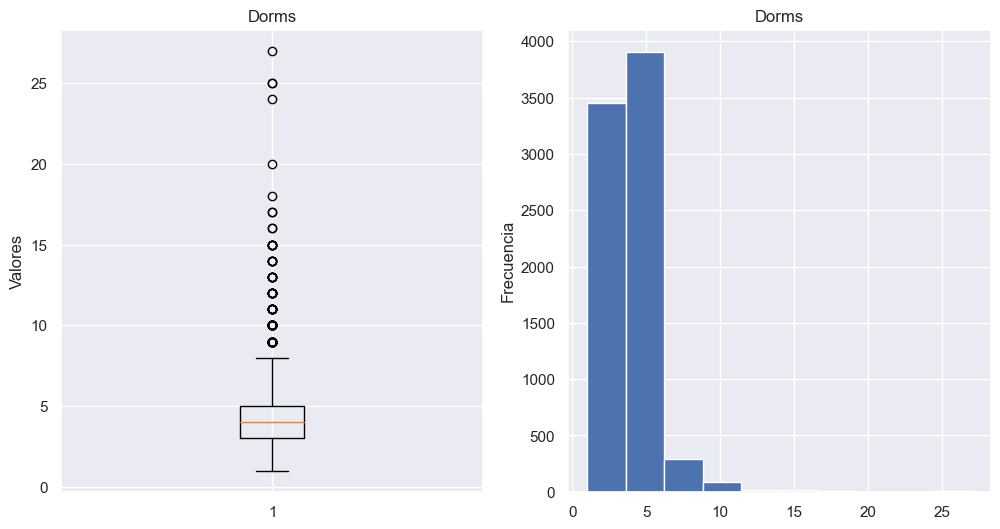

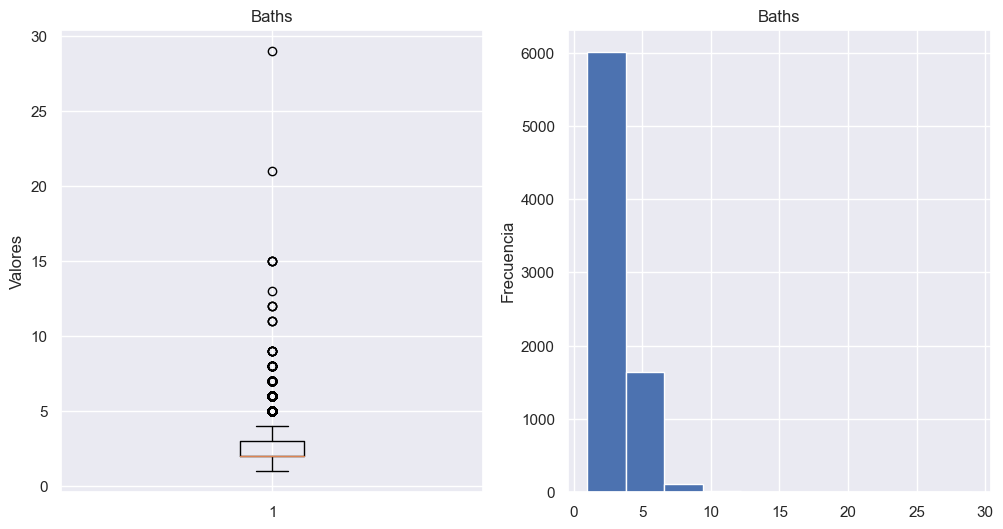

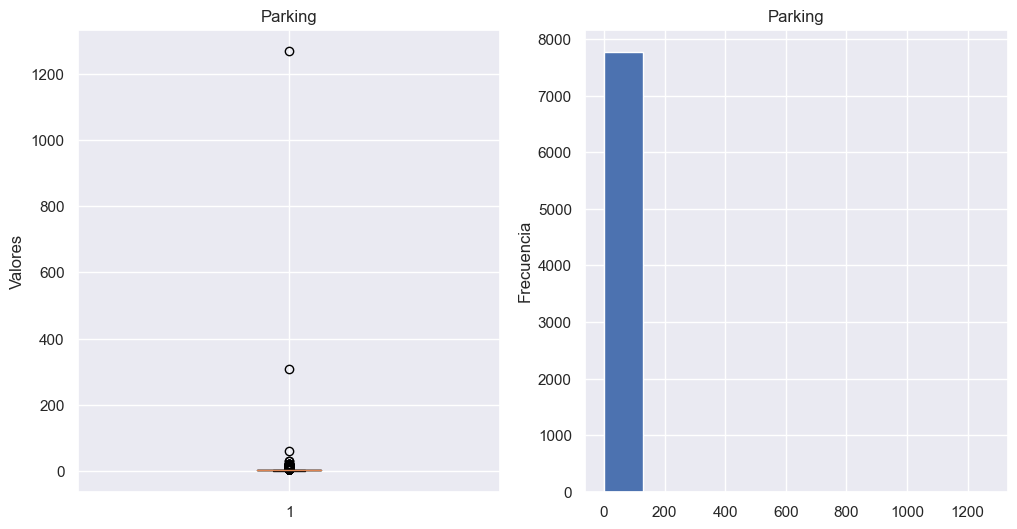

In [233]:
for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

Para el caso de los Dormitorios si bien se presentan algunos outliers, estos tienen coherencia en los datos, dada la superficie de la propiedad y el tipo de propiedad por lo que no se hará ninguna transformación.

In [234]:
df.sort_values(by="Dorms", ascending=False)[:10]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
4579,540000000,15173.00,672478.00,Independencia,maruri344,27,6,651.00,651.00,3,11244076,Todo Propiedades
5838,1850680000,52000.00,2304707.00,Santiago,Hotel,25,29,1200.00,500.00,6,5345651,Nativo Propiedades
6655,640000000,17983.00,797011.00,Santiago,(am50963)avmoneda/avmanuelrodrígueznte,25,4,713.00,410.00,3,4895748,Propiedades Centro Santiago SPA
6783,889750000,25000.00,1108032.00,Santiago,CasonaEsmeraldaentreSanAntonioyMacIver,24,7,810.00,810.00,8,9652894,Unne
6154,558407100,15690.00,695401.00,Santiago,Esperanza-Libertad,20,5,450.00,140.00,3,10777370,Unne
2295,599999990,16859.00,747198.00,Santiago,SantoDomingo,18,5,300.00,550.00,3,7657906,Agente Inmobiliario
5153,587235000,16500.00,731301.00,Santiago,Santiago,17,15,350.00,350.00,3,9050315,Agente Propiedades
5516,658415000,18500.00,819944.00,Santiago,SierraBella/PedroLagos,17,15,293.00,350.00,3,6022149,Jorge Pablo Caro Propiedades
72,533850000,15000.00,664819.00,LaFlorida,LaFlorida,16,12,389.00,890.00,3,2988676,Difusion Propiedades
6870,1210060000,34000.00,1506924.00,Providencia,ClementeFabres,16,8,600.00,907.00,3,9655114,Unne


Para los baños se sigue la estrategia de verificar si la cantidad de baños excede más de 3 a los dormitorios entonces se reemplazará por la cantidad de dormitorios, de esta manera se eliminará los datos que resulten como outliers o que tengan algún error como tener una excesiva cantidad de baños con respecto a los dormitorios, por ejemplo, una propiedad que presenta 3 dormitorios y 21 baños.

In [235]:
df.sort_values(by="Baths", ascending=False)[:5]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
5838,1850680000,52000.00,2304707.00,Santiago,Hotel,25,29,1200.00,500.00,6,5345651,Nativo Propiedades
5561,234894000,6600.00,292521.00,Colina,Casaenventaenayresdechicureo,3,21,94.00,345.00,2,11129230,Nexxos
4911,658415000,18500.00,819944.00,Santiago,AremioGutierrez/PedroLagos,15,15,272.00,390.00,3,9086158,Unne
5153,587235000,16500.00,731301.00,Santiago,Santiago,17,15,350.00,350.00,3,9050315,Agente Propiedades
4782,782980000,22000.00,975068.00,Providencia,PlazaItalia/Providencia,13,15,298.00,176.00,3,7111013,Unne


In [236]:
difference_bath = df["Dorms"] + 3

baths = []

for bath in zip(df["Baths"], difference_bath):
    if bath[0] > bath[1]:
        baths.append(bath[1])
    else:
        baths.append(bath[0])

df["Baths"] = baths


In [237]:
df.sort_values(by="Baths", ascending=False)[:5]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
5838,1850680000,52000.00,2304707.00,Santiago,Hotel,25,28,1200.00,500.00,6,5345651,Nativo Propiedades
4782,782980000,22000.00,975068.00,Providencia,PlazaItalia/Providencia,13,15,298.00,176.00,3,7111013,Unne
5153,587235000,16500.00,731301.00,Santiago,Santiago,17,15,350.00,350.00,3,9050315,Agente Propiedades
5516,658415000,18500.00,819944.00,Santiago,SierraBella/PedroLagos,17,15,293.00,350.00,3,6022149,Jorge Pablo Caro Propiedades
4911,658415000,18500.00,819944.00,Santiago,AremioGutierrez/PedroLagos,15,15,272.00,390.00,3,9086158,Unne


Para el caso del Parking, se reemplaza los 2 datos que están muy por encima del rango usando el promedio de la columna.

In [238]:
df.sort_values(by="Parking", ascending=False)[:5]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
253,925340000,26000.00,1152354.00,Ñuñoa,Hernancortes//pedrodevaldivia,11,4,567.00,702.00,1269,9275128,Unne
1495,209981000,5900.00,261496.00,EstaciónCentral,GeneralVelásquez,3,2,150.00,150.00,307,11978650,Easyprop
5146,770523500,21650.00,959556.00,Peñaflor,LasPalmeras,3,5,505.00,7332.00,60,9338146,Grupo Premium Propiedades Santiago
5309,320000000,8991.00,398506.00,Peñaflor,LosNogalesdeDonToribio,7,5,400.00,5000.00,30,9338062,Grupo Premium Propiedades Santiago
2767,729595000,20500.00,908587.00,Colina,LosIngleses,9,7,415.00,5000.00,30,9635872,Easyprop


In [239]:
df["Parking"].replace({1269: avg_parking, 307: avg_parking}, inplace=True)

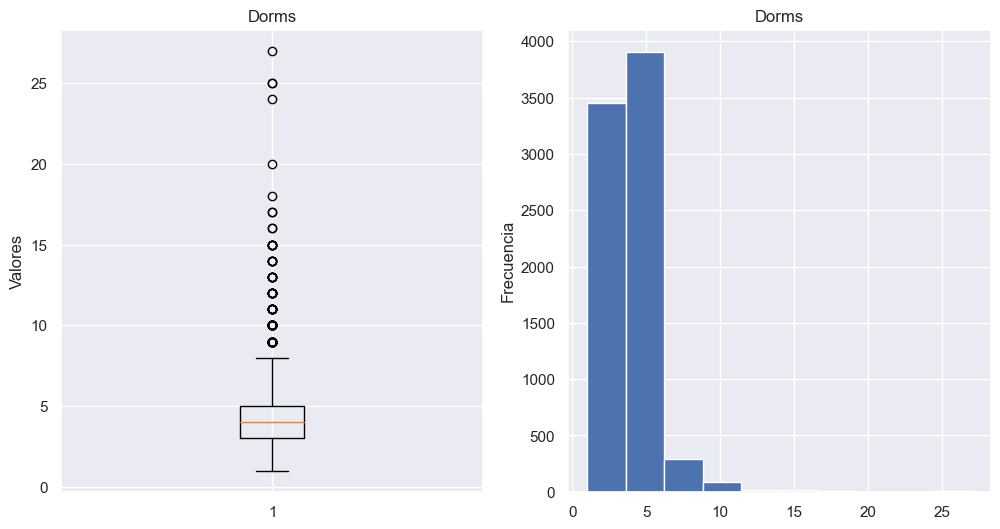

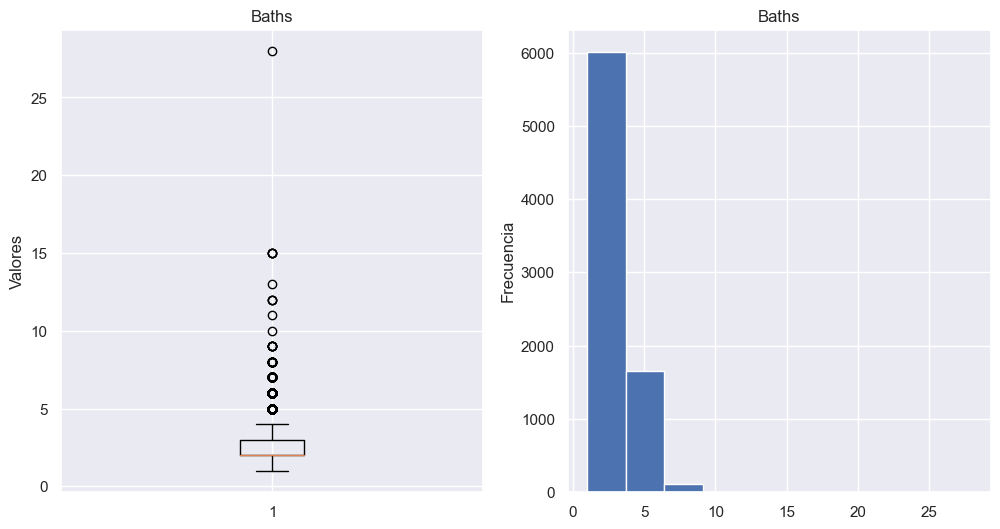

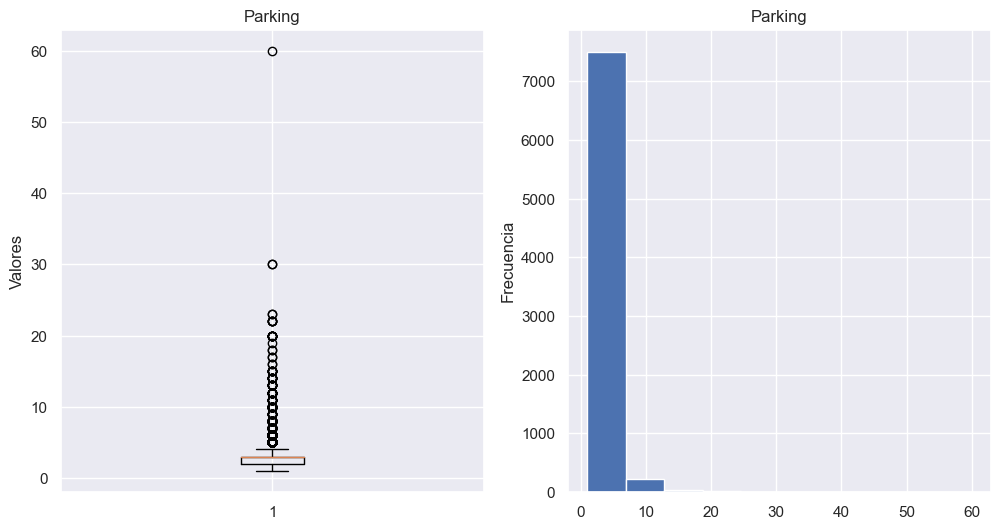

In [240]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "Dorms",
        "Baths",
        "Parking",
    ]
]

for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

Se observan outliers en la parte superior del Precio en CLP y Area Construida y Total, optará por eliminar estos datos ya que son muy pocos casos.

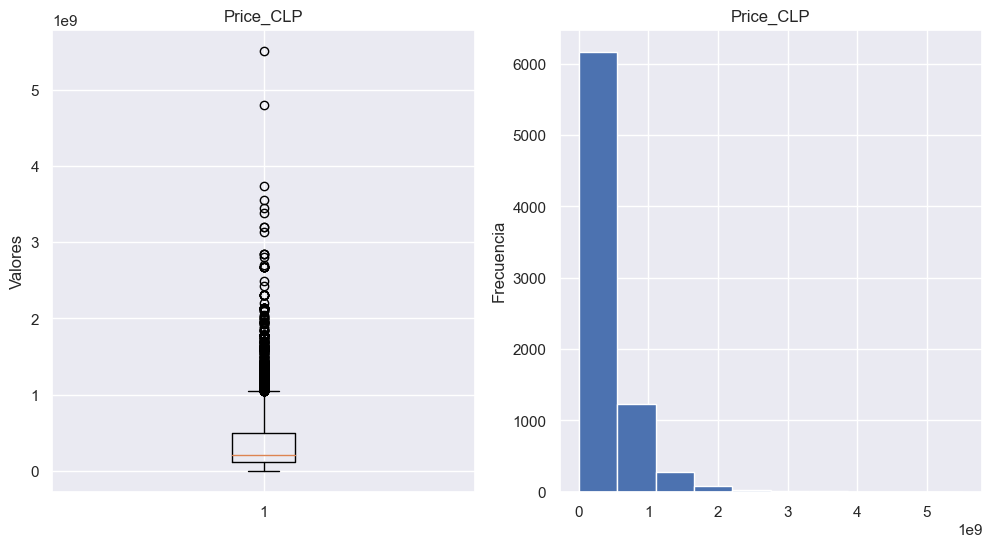

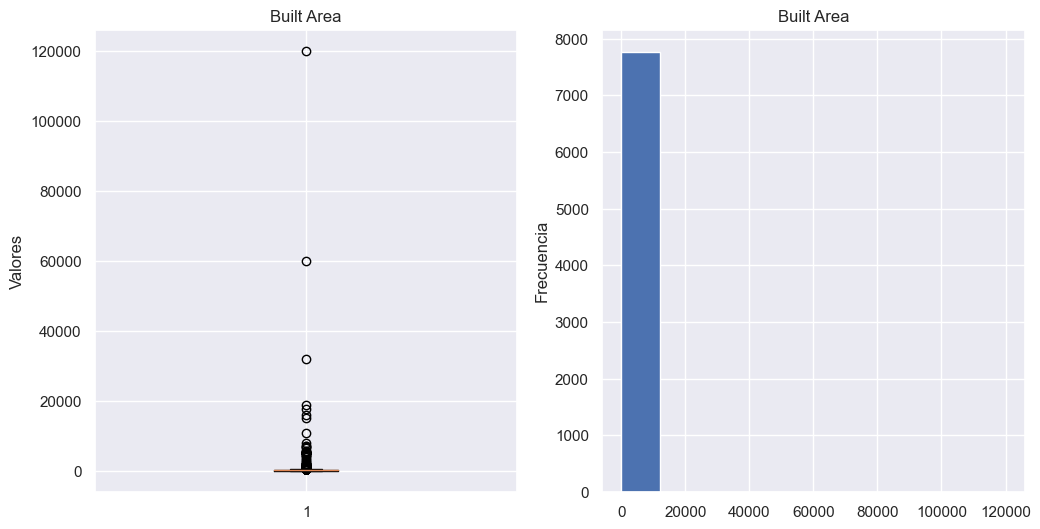

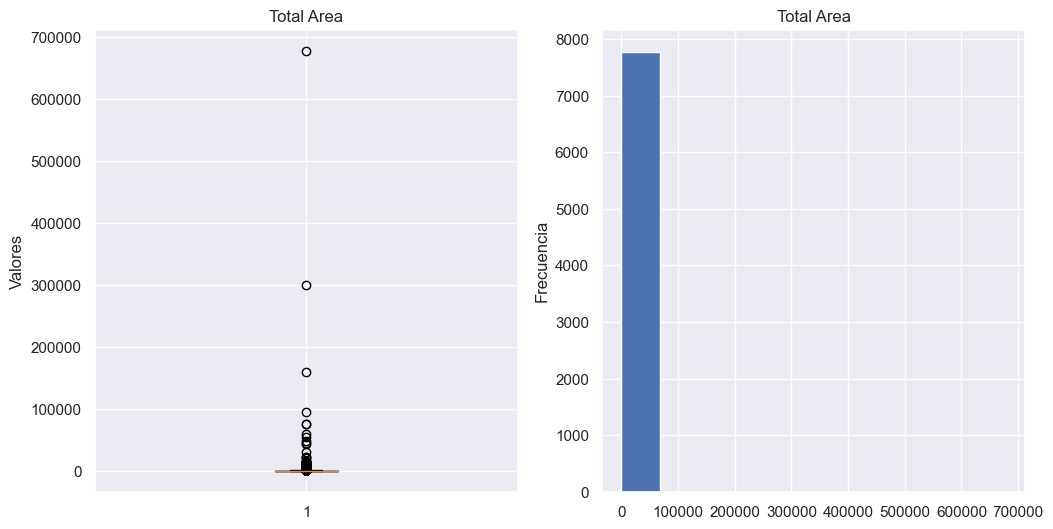

In [241]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "Price_CLP",
        "Built Area",
        "Total Area",
    ]
]

for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

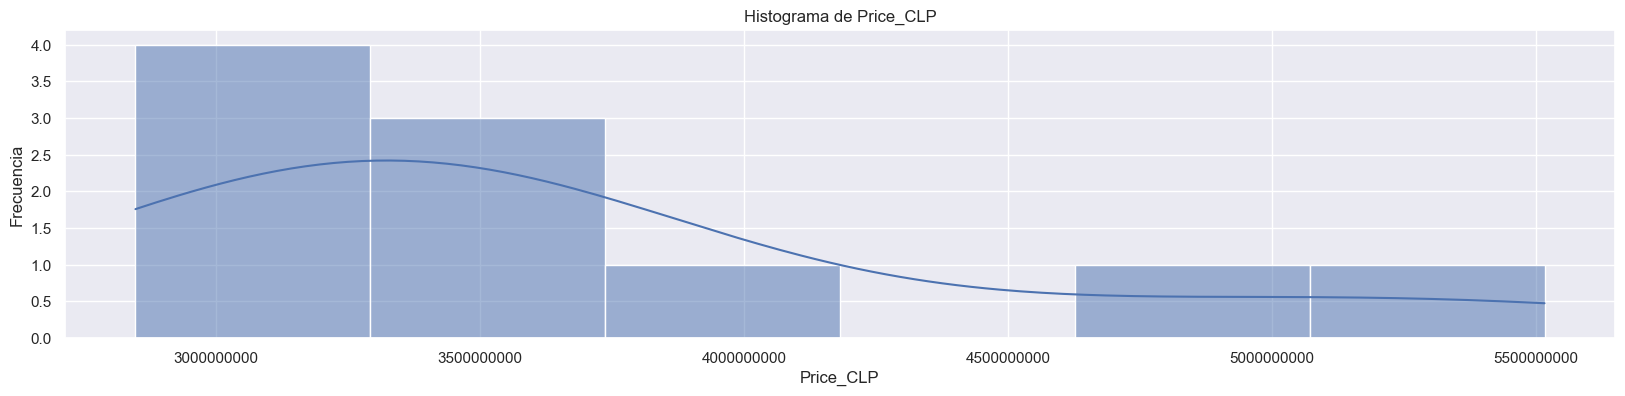

In [242]:
column = "Price_CLP"
df_inusual_high_price = df.sort_values(by=column, ascending=False)[:10]


plt.figure(figsize=(20, 4))
sns.histplot(x=df_inusual_high_price[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

In [243]:
df_inusual_high_price

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
2708,5516450000,155000.00,6869801.00,LasCondes,Isabellacatilca,4,3,140.00,160.00,2,11679296,Unne
403,4804650000,135000.00,5983375.00,LasCondes,Piedraroja,10,12,2400.00,5061.00,15,12288391,Viel la Dehesa SPA
7776,3736950000,105000.00,4653736.00,LasCondes,CaminoLasFlores/CaminoPiedraRoja,5,7,460.00,4925.00,8,6032811,Tsi Property
6568,3558288200,99980.00,4431243.00,LasCondes,CaminoLasFlores/CaminoPiedraRoja,5,7,460.00,4925.00,3,6233842,Tsi Property
408,3452230000,97000.00,4299166.00,LoBarnechea,Elrodeo-avenidaladehesa,5,4,400.00,2781.00,3,12288093,Viel la Dehesa SPA
860,3381050000,95000.00,4210523.00,Colina,Avda.Chicureo,6,8,1046.00,4820.00,16,12183104,Agustín Fuenzalida Propiedades
4651,3203100000,90000.00,3988917.00,Vitacura,Noespecifica,6,5,450.00,5000.00,8,11227584,Todo Propiedades
6665,3203100000,90000.00,3988917.00,LasCondes,CercanoaMallSport,5,4,300.00,2900.00,6,5669935,Grupo AG Propiedades
975,3131920000,88000.00,3900274.00,LasCondes,CaminoLaPosada,7,5,1477.00,4443.00,20,12136820,Agustín Fuenzalida Propiedades
4584,2847200000,80000.00,3545704.00,LasCondes,MiradordeSanDamian,5,6,650.00,2250.00,6,11226513,Todo Propiedades


In [244]:
df.drop(df[df["Price_CLP"] >= 4804650000].index, inplace=True)

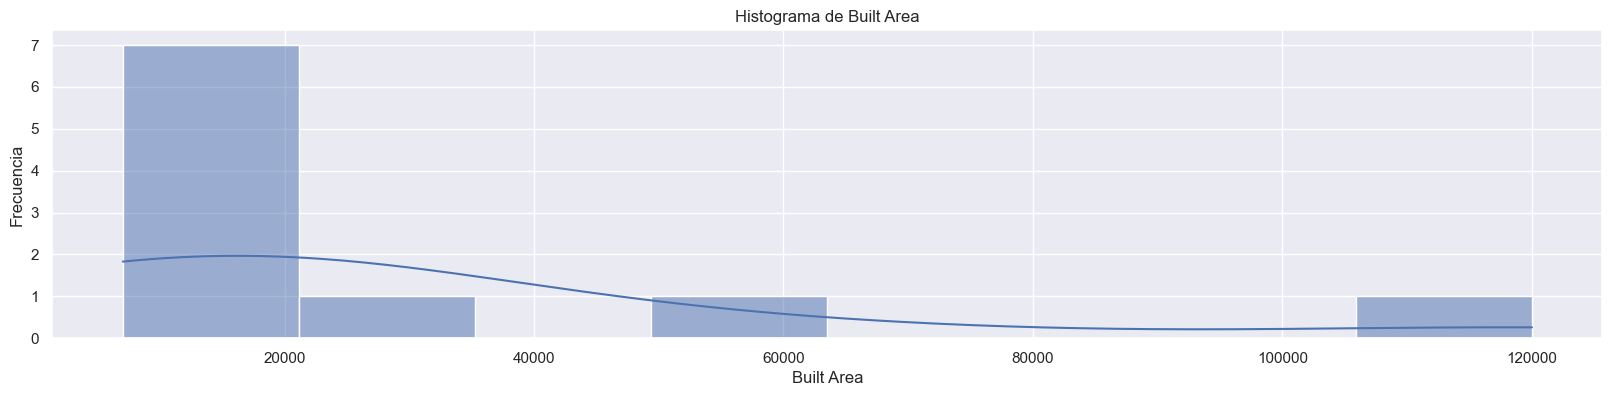

In [245]:
column = "Built Area"
df_inusual_high_built_area = df.sort_values(by=column, ascending=False)[:10]


plt.figure(figsize=(20, 4))
sns.histplot(x=df_inusual_high_built_area[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

In [246]:
df_inusual_high_built_area

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
7214,130000000,3653.00,161893.00,Santiago,Av.LosCerrillos639,3,1,120000.00,300000.00,2,11362374,orietta alvarez lobos
784,2135400000,60000.00,2659278.00,SanJosédeMaipo,Casamaipo,14,3,60000.00,60000.00,3,12196441,Invictus Spa
5874,889750000,25000.00,1108032.00,Colina,lasbrisasdechicureo,4,4,31972.00,2892.00,6,11089439,Nexxos
2248,925340000,26000.00,1152354.00,LoBarnechea,Caminodelabrisa,5,4,18917.00,11927.00,2,11347739,Unne
2773,925304410,25999.00,1152309.00,Talagante,LonquenSurParadero/,6,3,17525.00,1800.00,5,7658745,Agente Inmobiliario
385,517300650,14535.00,644210.00,Vitacura,ColegioSagradosCorazonesdeManquehue,5,1,15951.00,250.00,3,12292519,Bofill y Asociados Ltda
5038,886191000,24900.00,1103600.00,Santiago,TalaganteSantiagodeChile,5,3,15190.00,15190.00,10,11209591,Tradehouse
4688,110000000,3091.00,136986.00,Maipú,Villalaarboleda,4,2,10875.00,10875.00,1,11556939,Easyprop
3131,425300500,11950.00,529639.00,Peñaflor,CondominioSantaMaríadePeñaflor,5,4,8000.00,320.00,3,7702550,Armacima
6290,142004100,3990.00,176842.00,LaFlorida,tineoconavtrinidadoriente,3,2,7035.00,1278.00,2,11449478,Propital


In [247]:
df.drop(df[df["Built Area"] >= 31972.0].index, inplace=True)

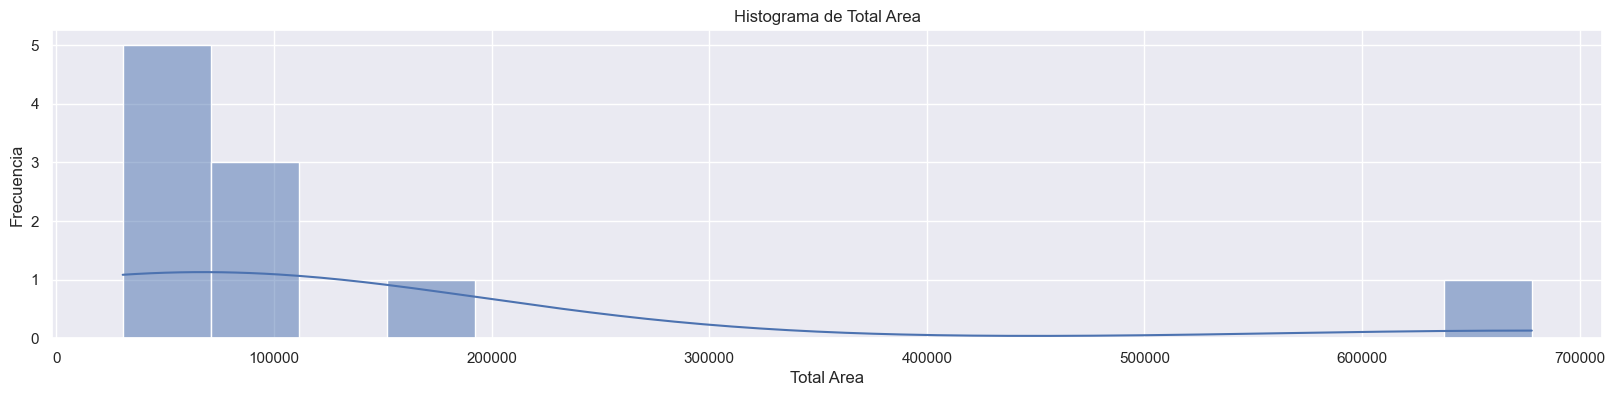

In [248]:
column = "Total Area"
df_inusual_high_total_area = df.sort_values(by=column, ascending=False)[:10]


plt.figure(figsize=(20, 4))
sns.histplot(x=df_inusual_high_total_area[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

In [249]:
df_inusual_high_total_area

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
3304,800775000,22500.00,997229.00,LoBarnechea,Av.Ladehesa,5,3,250.00,678000.00,4,10028910,Unne
7262,159000000,4468.00,198007.00,Independencia,BrigadierCarlosGarrido1718,4,2,99.00,160000.00,1,11341949,Unne
2156,1099731000,30900.00,1369528.00,LasCondes,ColinadeGloria/GralBalnche,4,4,327.00,94929.00,3,9793534,Unne
573,470000000,13206.00,585305.00,Tiltil,LasBateas,4,4,290.00,75000.00,3,12251617,Schumacher Propiedades
2504,470000000,13206.00,585305.00,Tiltil,LasBateas,4,4,290.00,75000.00,3,4901365,Schumacher Propiedades
4385,231335000,6500.00,288088.00,Tiltil,Noespecifica,5,4,200.00,54000.00,10,11233359,Todo Propiedades
395,889750000,25000.00,1108032.00,Curacaví,Fundoloscapachos/jardinalto,7,4,787.00,47800.00,3,12290831,Bofill y Asociados Ltda
5485,2313350000,65000.00,2880884.00,Colina,SanJosé-SantaCecilia,6,6,500.00,45500.00,9,11166330,Nexxos
3726,1601550000,45000.00,1994458.00,LoBarnechea,CaminoElCajon19100,6,6,1140.00,44000.00,13,7449603,Mi Llave
5478,1601550000,45000.00,1994458.00,Colina,SanJosé-SantaCecilia,6,6,500.00,30500.00,9,11166251,Nexxos


In [250]:
df.drop(df[df["Total Area"] >= 94929.0].index, inplace=True)

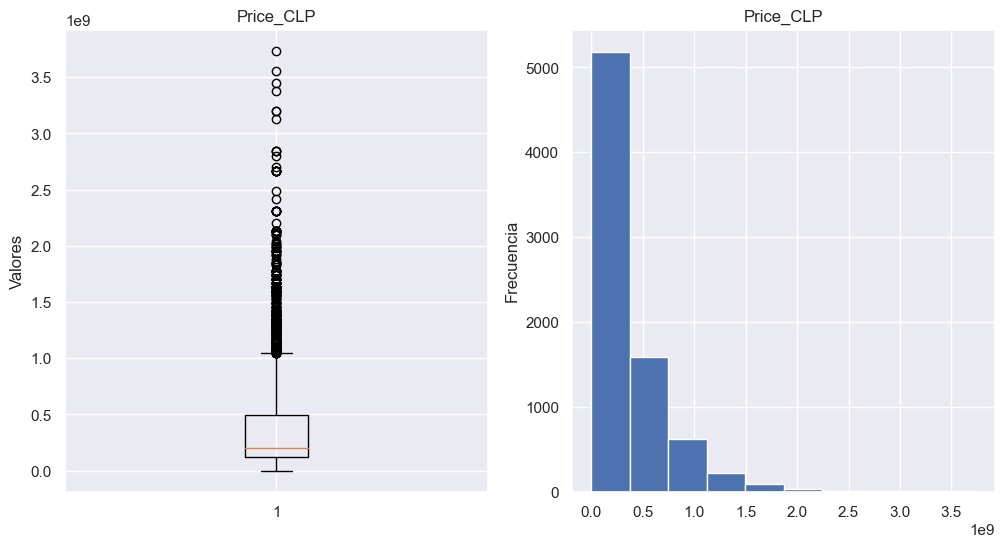

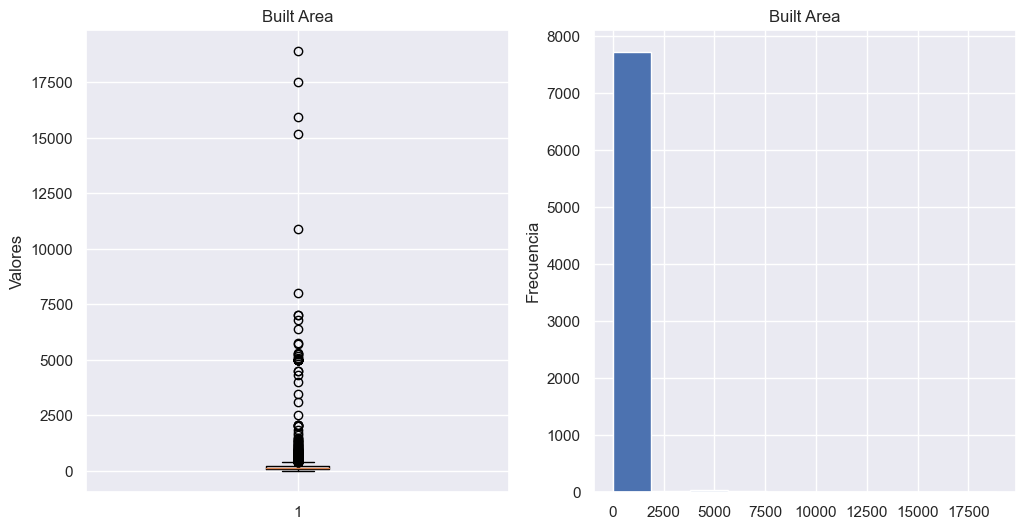

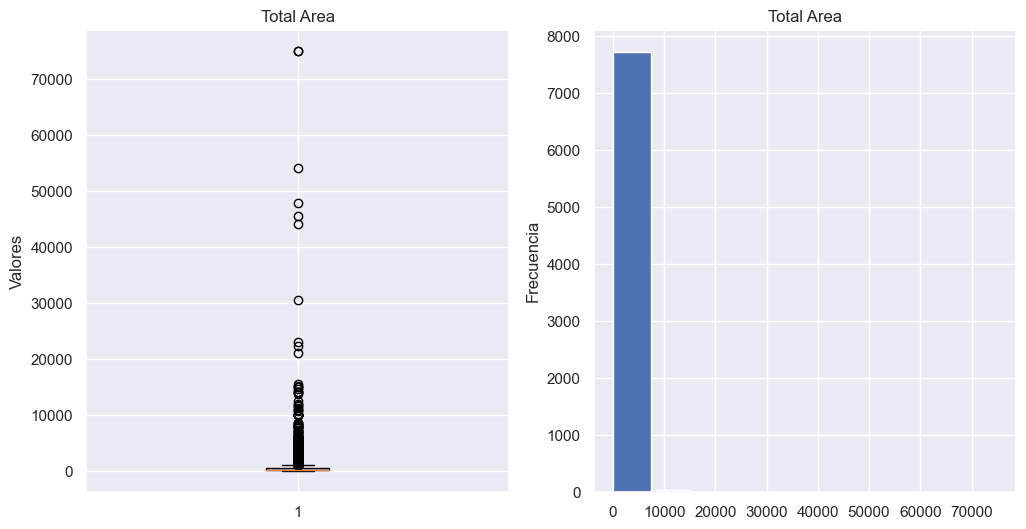

In [251]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "Price_CLP",
        "Built Area",
        "Total Area",
    ]
]

for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

## Valores erróneos

Se observan algunas propiedades con una superficie de uno, se imputarán usando el promedio de la columna

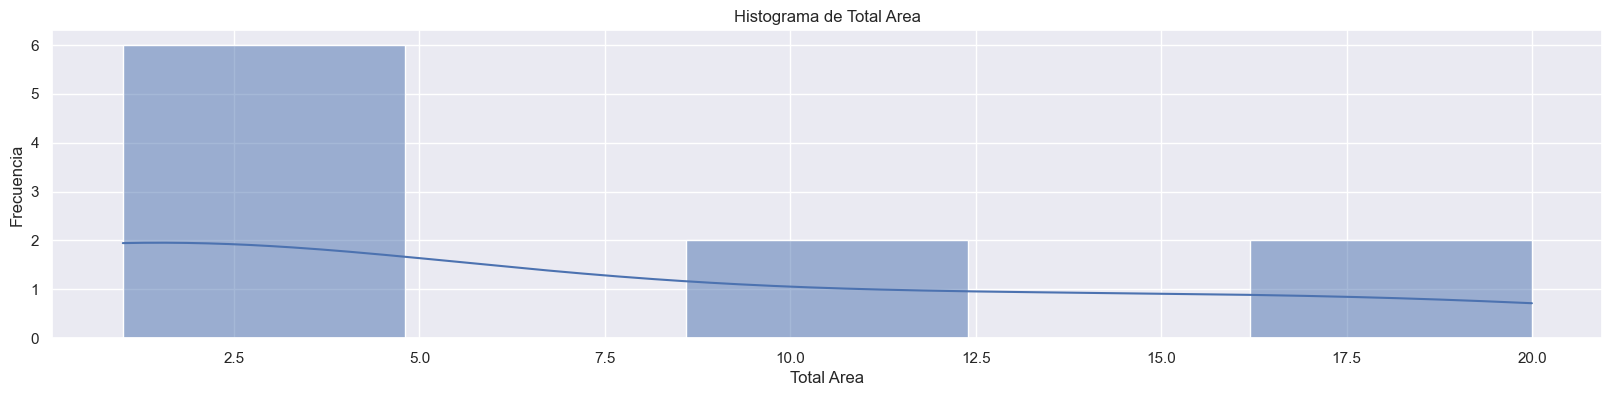

In [252]:
column = "Total Area"
df_total_area = df.sort_values(by=column, ascending=True)[:10]

plt.figure(figsize=(20, 4))
sns.histplot(x=df_total_area[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

In [253]:
df[df["Total Area"] < 30]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
433,675498200,18980.00,841218.00,Providencia,SCDarioUrzuaconPedrodelValdivia,8,4,240.00,20.00,3,12282648,Nieto & Stone Propiedades
1553,40000000,1124.00,49813.00,Peñaflor,Pje.Cam.delCerro172,2,1,50.00,25.00,10,11967381,Corredores Asociados - OpenBrokers
1585,64140500,1802.00,79876.00,Santiago,SanDiegoconÑuble,1,1,18.00,18.00,3,11959993,Corredores Asociados - OpenBrokers
2460,14500000,407.00,18057.00,SanBernardo,Eyzaguirre,2,1,20.00,20.00,3,8544379,Mi Llave
2648,1420041000,39900.00,1768420.00,Vitacura,LuisCarrera/LuisPasteur,3,2,168.00,1.00,3,10093845,Propiedades Ricardo Vial y Cia. Ltda.
3470,155000000,4355.00,193026.00,Maipú,villaoneillexfuncionariosgoodyear,4,2,190.00,1.00,4,9562520,Mi Llave - LITE
4732,105000000,2950.00,130760.00,Maipú,Elabrazo,3,2,1.00,1.00,3,9827974,Unne
5560,747390000,21000.00,930747.00,LoBarnechea,Ventacasaconespectacularvistaenclubdegolflomas...,4,4,1.00,1.00,3,10217314,Scn Propiedades Ltda
5580,90000000,2529.00,112080.00,Conchalí,Am55919av.Cardenal/av.Independencia,7,1,98.00,12.00,3,6192065,Propiedades Centro Santiago SPA
6197,199304000,5600.00,248199.00,PuenteAlto,Casacondominiolasmercedespuentealto,3,3,1.00,1.00,3,10205256,Movahome Corredores Integrados


In [254]:
df["Total Area"].replace({1.0: avg_total_area}, inplace=True)
df[df["Total Area"] < 30]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
433,675498200,18980.00,841218.00,Providencia,SCDarioUrzuaconPedrodelValdivia,8,4,240.00,20.00,3,12282648,Nieto & Stone Propiedades
1553,40000000,1124.00,49813.00,Peñaflor,Pje.Cam.delCerro172,2,1,50.00,25.00,10,11967381,Corredores Asociados - OpenBrokers
1585,64140500,1802.00,79876.00,Santiago,SanDiegoconÑuble,1,1,18.00,18.00,3,11959993,Corredores Asociados - OpenBrokers
2460,14500000,407.00,18057.00,SanBernardo,Eyzaguirre,2,1,20.00,20.00,3,8544379,Mi Llave
5580,90000000,2529.00,112080.00,Conchalí,Am55919av.Cardenal/av.Independencia,7,1,98.00,12.00,3,6192065,Propiedades Centro Santiago SPA
6698,61250390,1721.00,76277.00,Santiago,mapocho,1,1,21.00,21.00,3,9690314,Mujer Inmobiliaria
7250,658450590,18501.00,819988.00,LasCondes,Vaticano,3,2,167.00,10.00,2,6680350,Unne


In [255]:
df.shape

(7770, 12)

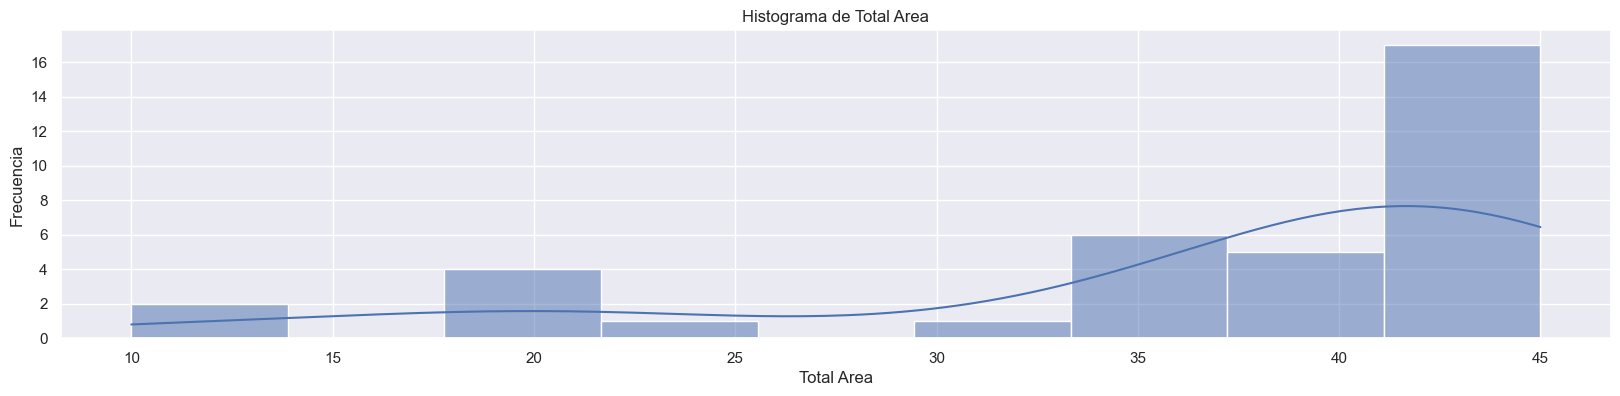

In [256]:
column = "Total Area"
df_total_area = df.sort_values(by=column, ascending=True)[:36]

plt.figure(figsize=(20, 4))
sns.histplot(x=df_total_area[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

Se observan precios insualmente bajos en propiedades por debajo de las 800 UF, para resolver esto se calculará el precio promedio por comuna del m2 y se imputará usando el area total multiplicada por el el precio promedio calculado.

In [257]:
df.sort_values(by="Price_CLP", ascending=True)[30:35]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
2460,14500000,407.00,18057.00,SanBernardo,Eyzaguirre,2,1,20.00,20.00,3,8544379,Mi Llave
7561,15000000,421.00,18680.00,Santiago,CalleSanIgnaciodeLoyola,2,2,229.92,807.23,3,10371500,Arauco Propiedades Spa
4675,30000000,843.00,37360.00,PuenteAlto,Sargentomenadier2010,1,1,45.00,45.00,1,11225644,Todo Propiedades
5337,35000000,983.00,43587.00,Lampa,alcaldemanuelhuichipococonjoaquinundurraga,1,1,55.00,71.00,1,10735543,Mi Llave
2665,35000000,983.00,43587.00,PuenteAlto,Casa2PisosenP.Alto,3,1,71.00,63.00,3,6169591,Corretajes Prosal


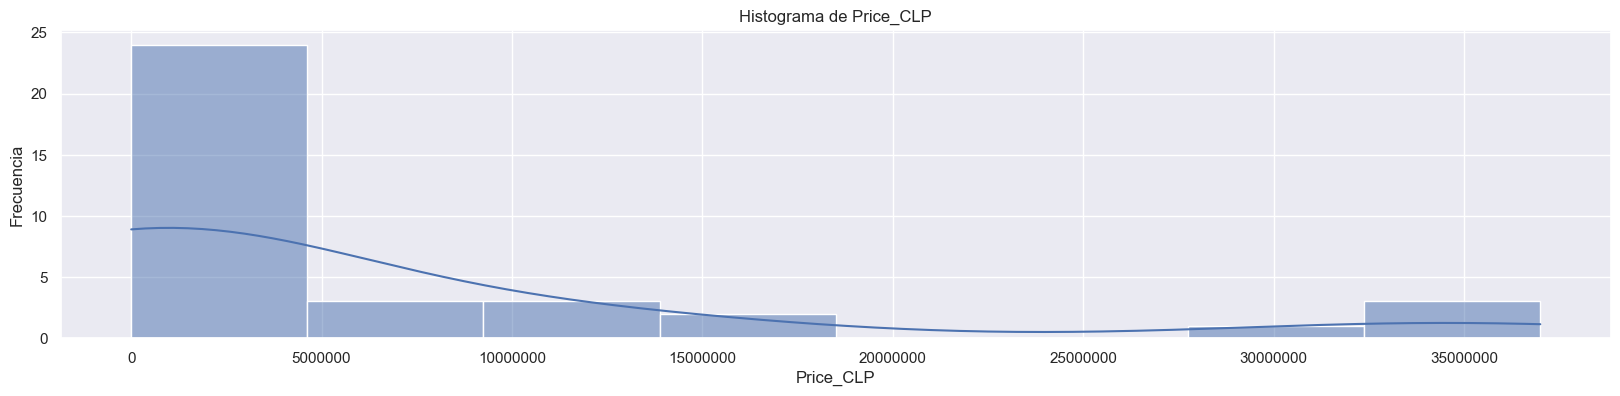

In [258]:
df_inusual_low_price = df.sort_values(by="Price_CLP", ascending=True)[:36]

column = "Price_CLP"

plt.figure(figsize=(20, 4))
sns.histplot(x=df_inusual_low_price[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

In [259]:
df_comunas = df.copy()

comunas = df_comunas["Comuna"].unique()

dfs_por_comuna = [df_comunas[df_comunas["Comuna"] == comuna] for comuna in comunas]

In [260]:
for df_comuna in dfs_por_comuna:
    df_comuna.loc[:,"Land Price"] = df_comuna.loc[:,"Price_CLP"] / df_comuna.loc[:,"Total Area"]

In [261]:
avgs_land_value_by_comuna = []

for df_comuna in range(len(dfs_por_comuna)):
    avgs_land_value_by_comuna.append(dfs_por_comuna[df_comuna]["Land Price"].mean())

In [262]:
avgs_land_value_by_comuna_rounded = [ceil(avg) for avg in avgs_land_value_by_comuna]

In [263]:
avgs_land_value_by_comuna_dict = dict(zip(comunas, avgs_land_value_by_comuna_rounded))

In [264]:
df_below_800UF  = df[df["Price_UF"] < 800]

df.drop(df[df["Price_UF"] < 800].index, inplace=True)

df_below_800UF.shape

(32, 12)

In [265]:
df.shape

(7738, 12)

In [266]:
df_below_800UF["Avg Land Price by Comuna"] = df_below_800UF["Comuna"].map(avgs_land_value_by_comuna_dict)

In [267]:
df_below_800UF["Price_CLP"] = df_below_800UF["Total Area"] * df_below_800UF["Avg Land Price by Comuna"]


In [268]:
df_below_800UF.drop("Avg Land Price by Comuna", axis=1, inplace=True)

In [269]:
df = pd.concat([df, df_below_800UF], ignore_index=True, sort=False )

In [270]:
df.shape

(7770, 12)

Recalcular el valor en USD y en UF al valor actual (27-01-2024)

In [271]:
uf = 36792.48
usd = 922

df["Price_UF"] = round(df["Price_CLP"] / uf, 1)
df["Price_USD"] = round(df["Price_CLP"] / usd, 1)

df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,409285000.00,11124.10,443910.00,QuintaNormal,Hoevel4548y4558,7,4,384.00,732.00,3,11700213,Unne
1,105000000.00,2853.80,113882.90,PedroAguirreCerda,Rucalhue,2,1,112.00,145.00,1,10894299,Legales y Propiedades SpA
2,128124000.00,3482.30,138963.10,EstaciónCentral,AvenidaLasParcelas,3,1,59.00,243.00,2,10257635,Propiedadesrs
3,75000000.00,2038.50,81344.90,Colina,PasajeGonzaloRojas,3,1,103.00,73.00,1,9232092,Patricio Gajardo propiedades
4,53000000.00,1440.50,57483.70,Colina,HernánDíazArrieta2820,2,1,57.00,67.00,1,7085397,Patricio Gajardo propiedades


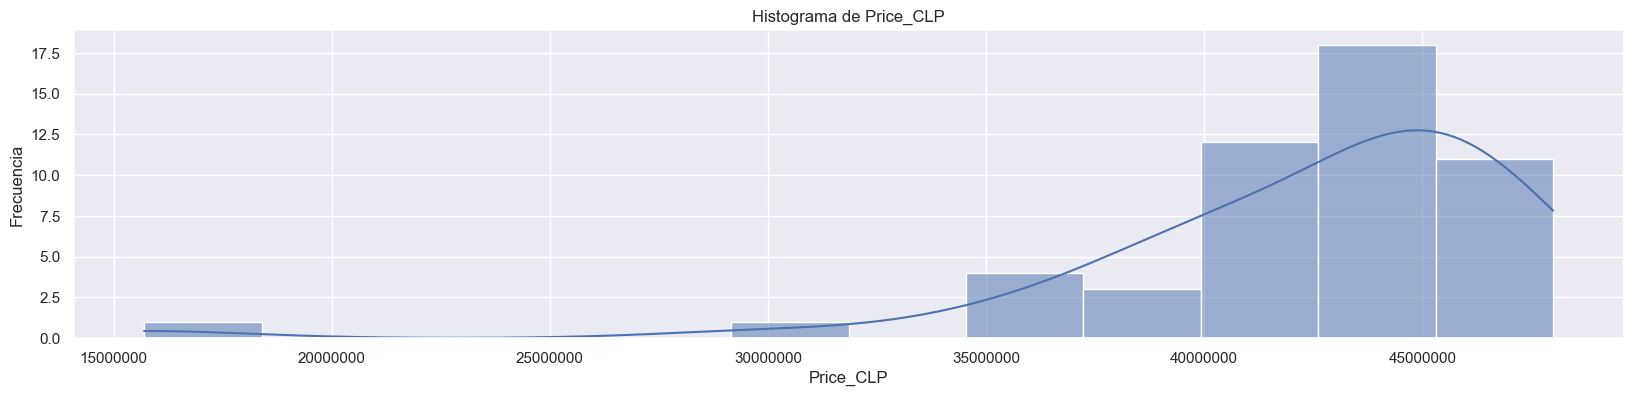

In [272]:
column = "Price_CLP"
df_price = df.sort_values(by=column, ascending=True)[:50]

plt.figure(figsize=(20, 4))
sns.histplot(x=df_price[column], kde=True)
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(column)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {column}")
plt.show()

# **4. ANÁLISIS ESTADÍSTICO** 

## Variables Cuantitativas

### Medidas de tendencia central, mínimos, máximos y rangos intercuartílicos

In [273]:
df.describe().round(1)

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7770.00,7770.00,7770.00,7770.00,7770.00,7770.00,7770.00,7770.00,7770.00
mean,364687885.00,9912.00,395540.00,4.00,2.70,202.50,641.20,2.80,9909437.90
std,381263116.40,10362.50,413517.50,1.60,1.40,537.50,2093.40,2.10,2046882.80
min,15694620.00,426.60,17022.40,1.00,1.00,1.00,10.00,1.00,1213620.00
25%,120000000.00,3261.50,130151.80,3.00,2.00,87.00,130.00,2.00,8563017.00
50%,206422000.00,5610.40,223885.00,4.00,2.00,130.00,220.00,3.00,10547966.00
75%,491142000.00,13349.00,532692.00,5.00,3.00,215.00,485.00,3.00,11524608.00
max,4246135000.00,115407.70,4605352.50,27.00,28.00,18917.00,75000.00,60.00,12341490.00


En resumen, el precio promedio ronda las 10 mil UF, con una desviación estándar cercana al mismo valor. El promedio de dormitorios es de 4 con una desviación de 1.6, en promedio hay 2.6 baños por propiedad con una desviación de 1.4, un área construida de 202 m en promedio y una desviación de 537.5 m, un área total promedio de 641.2 m con una desviación de 2093.4 m y 2.8 estacionamientos de media con una desviación de 2.1 estacionamientos.

Para las variables Dormitorios, Baños, Área construida y Estacionamiento el mínimo es de 1.0, los máximos corresponden a 27, 28, 18917 y 60, respectivamente. Para el caso del Precio tenemos un mínimo de 426.6 UF y máximo de 115407.7 UF. Para Área Total el mínimo es de 641.2 y el máximo de 75000.

Se observa una alta dispersión en los datos, específicamente, en las variables de Precio en CLP, Área construida, Área Total y Estacionamientos donde la desviación estándar es mayor o casi igual a la media.

### Distribución para variables discretas

Ahora construiremos los gráficos para mostrar la distribución de las variables discretas de Dormitorios, Baños y Estacionamientos.

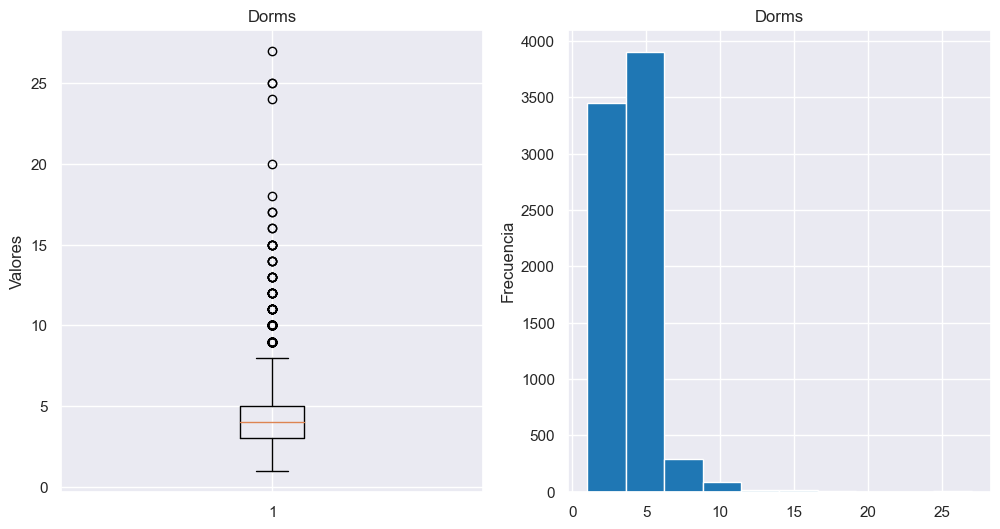

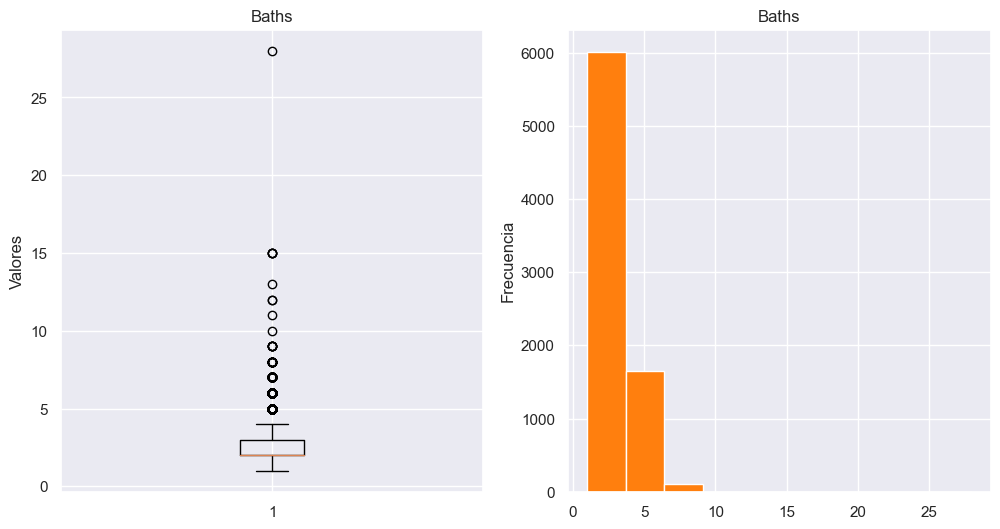

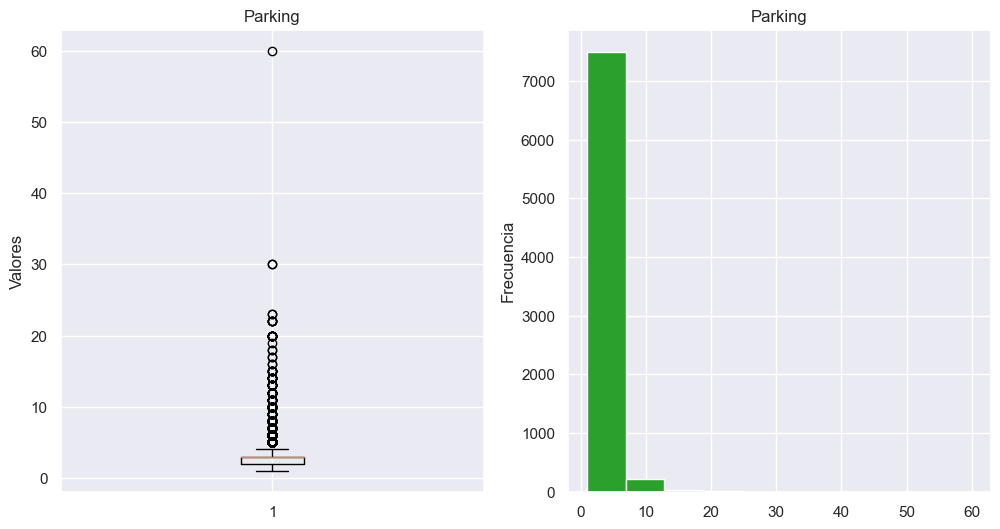

In [307]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "Dorms",
        "Baths",
        "Parking",
    ]
]

colors_list = ["tab:blue", "tab:orange", "tab:green"]

for index, col in enumerate(discrete_cols):
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col], color=colors_list[index])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

In [303]:
for index, col in enumerate(discrete_cols):
    print(index)

0
1
2


A continuación se calcula el coeficiente de asimetría para los datos mencionados.

In [275]:
from scipy.stats import skew

for col in discrete_cols:
    print(f"Coeficiente de asimetría (skew) para la {col}: {round(skew(numeric_cols[col]), 2)}.")

Coeficiente de asimetría (skew) para la Dorms: 3.02.
Coeficiente de asimetría (skew) para la Baths: 1.96.
Coeficiente de asimetría (skew) para la Parking: 6.38.


En las tres variables se observa un sesgo de la distribución hacia la izquierda, es decir, asimetría positiva, esto nos indica que la mayor parte de los datos se encuentran en valores bajos.

### Distribución para variables continuas

Para las variables Precio en CLP, Área Total y Área construida total se usará el gráfico de distribución KDE

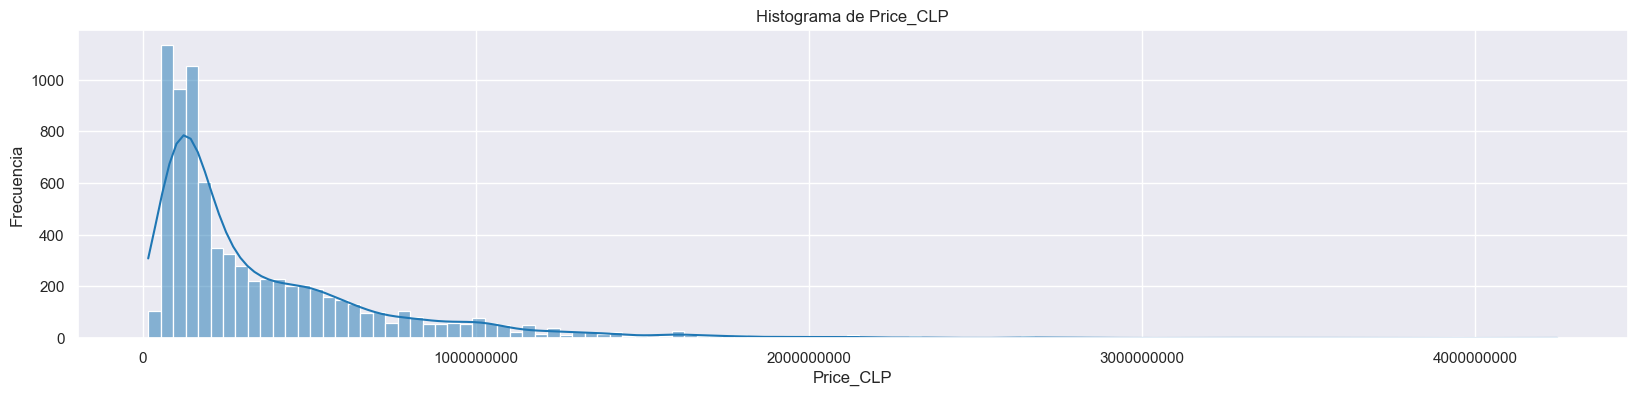

In [310]:
col = "Price_CLP"
plt.figure(figsize=(20, 4))
sns.histplot(x=df[col], kde=True, color="tab:blue")
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {col}")
plt.show()

Para Área Total y Área construida total se omitió los valores superiores ya que distorsionaban el gráfico

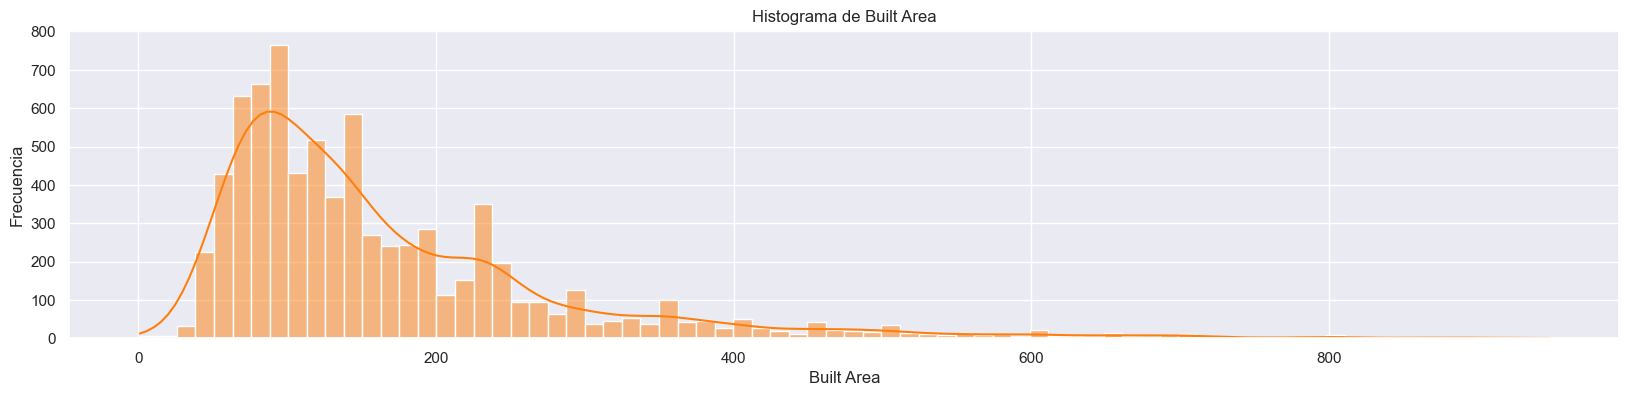

In [308]:
col = "Built Area"
df_built_area = df.sort_values(by=col, ascending=True)[:int((len(df)//100) * 100)]

plt.figure(figsize=(20, 4))
sns.histplot(x=df_built_area[col], kde=True, color="tab:orange")
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {col}")
plt.show()

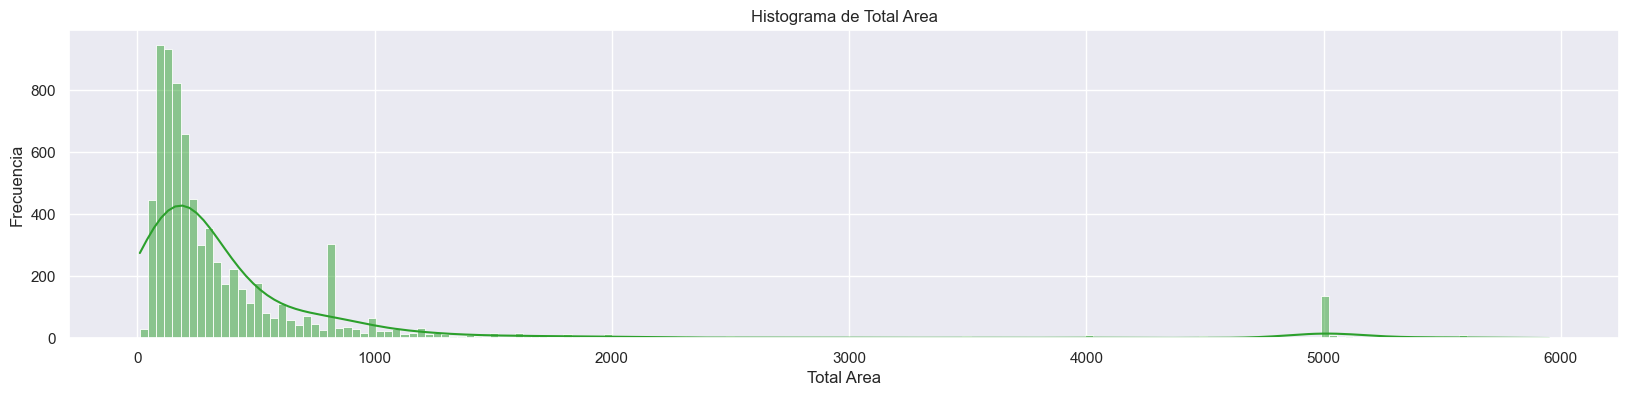

In [309]:
col = "Total Area"
df_total_area = df.sort_values(by=col, ascending=True)[:int((len(df)//100) * 100)]

plt.figure(figsize=(20, 4))
sns.histplot(x=df_total_area[col], kde=True, color="tab:green")
plt.ticklabel_format(useOffset=False, style="plain")
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {col}")
plt.show()

Al igual que en caso anterior se calculará el coeficiente de asimetría

In [279]:
continuos_cols = numeric_cols[[
    "Price_CLP",
    "Built Area",
    "Total Area"
]]

from scipy.stats import skew

for col in continuos_cols:
    print(f"Coeficiente de asimetría (skew) para la {col}: {round(skew(numeric_cols[col]), 2)}.")

Coeficiente de asimetría (skew) para la Price_CLP: 2.54.
Coeficiente de asimetría (skew) para la Built Area: 20.58.
Coeficiente de asimetría (skew) para la Total Area: 19.38.


En las tres variables, y al igual que en los casos anteriores, se observa un sesgo de la distribución hacia la izquierda, es decir, asimetría positiva, esto nos indica que la mayor parte de los datos se encuentran en valores bajos.

### Matriz de correlación

Para este caso se eligen las variables numéricas principales, éstas se estandarizan, luego se calcula la matriz inversa, posteriormente la matriz de covarianza y por último se visualiza con ayuda del mapa de calor o heatmap.

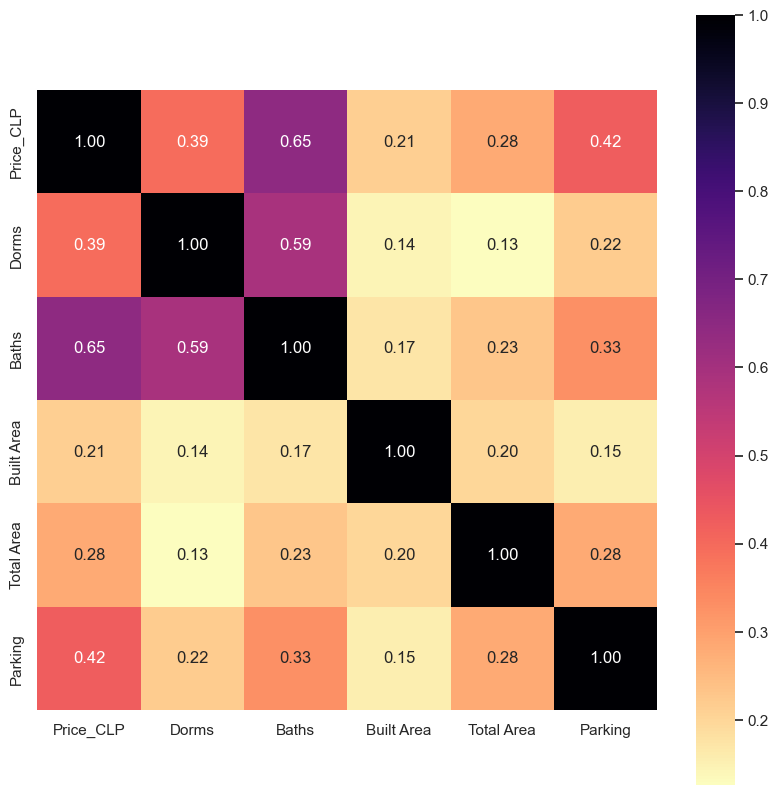

In [280]:
from sklearn.preprocessing import StandardScaler

cols = ["Price_CLP", "Dorms", "Baths", "Built Area", "Total Area", "Parking"]

scaler = StandardScaler()
scaled = scaler.fit_transform(df[cols])
scaled.T

covariance_matrix = np.cov(scaled.T)
covariance_matrix

plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
hm = sns.heatmap(
    covariance_matrix,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 12},
    yticklabels=cols,
    xticklabels=cols,
    cmap="magma_r"
)
plt.show()

Se aprecia que la variable que posee mayor correlación positiva con el Precio en CLP es Baños; con una asociación moderada, seguida de Dormitorios; con una asociación mediana y Estacionamientos que también posee una asociación mediana. Para las variables Área total y Área construida la asociación se vuelve pequeña.

### Gráficos de dispersión para las variables con mayor correlación positiva

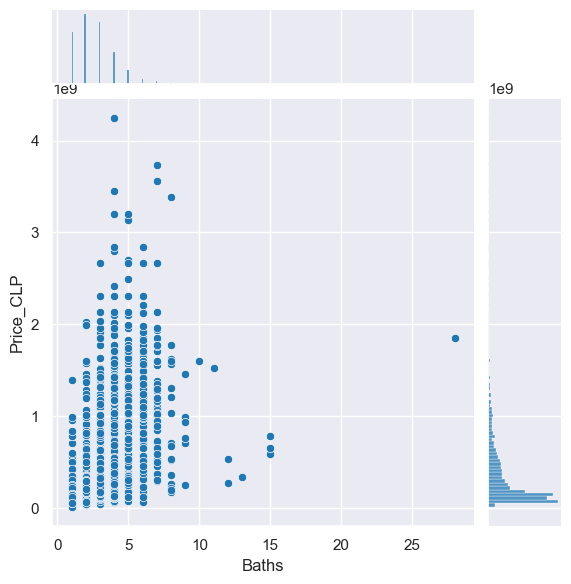

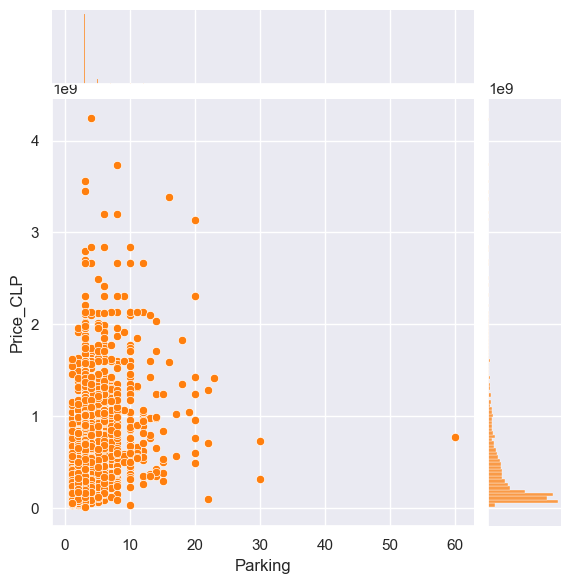

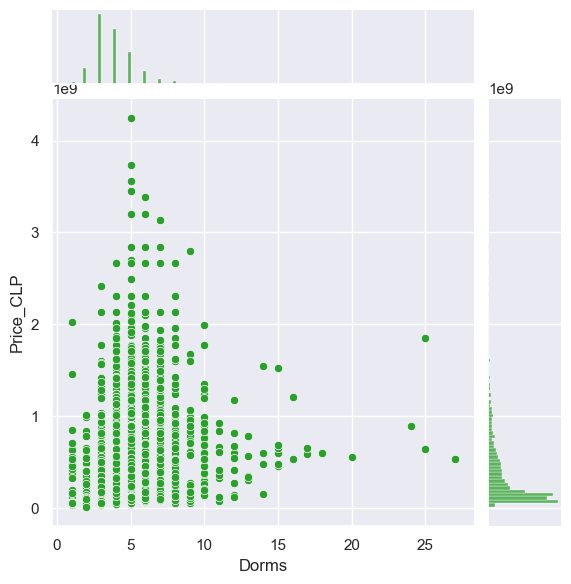

In [311]:
cols = ["Baths", "Parking", "Dorms"]

for index, col in enumerate(cols):
    sns.jointplot(x= df[col], y=df["Price_CLP"], color=colors_list[index])
    plt.show()

## Variables Cualitativas

### Frecuencia para variables categóricas

Función de tablas de frecuencia

In [282]:
def calcular_tabla_frecuencias(datos, columna):

    tabla_frecuencia_absoluta = datos[columna].value_counts().reset_index()
    tabla_frecuencia_absoluta.columns = [f'{columna} (xi)', 'F. Absoluta (fi)']

    tabla_frecuencia_absoluta['F. A. Acumulada (Fi)'] = tabla_frecuencia_absoluta['F. Absoluta (fi)'].cumsum()

    total_observaciones = len(datos)
    tabla_frecuencia_absoluta['F. Relativa (hi)'] = tabla_frecuencia_absoluta['F. Absoluta (fi)'] / total_observaciones

    tabla_frecuencia_absoluta['F. R. Acumulada (Hi)'] = tabla_frecuencia_absoluta['F. Relativa (hi)'].cumsum()

    pd.set_option('display.float_format', '{:.2f}'.format)

    tabla_frecuencia_absoluta = tabla_frecuencia_absoluta.sort_values(by='F. Absoluta (fi)', ascending=False)
    return tabla_frecuencia_absoluta

#### Tabla de frencuencia para Comunas

In [283]:
calcular_tabla_frecuencias(df,"Comuna")

,Comuna (xi),F. Absoluta (fi),F. A. Acumulada (Fi),F. Relativa (hi),F. R. Acumulada (Hi)
0,PuenteAlto,814,814,0.10,0.10
1,LasCondes,635,1449,0.08,0.19
2,Maipú,630,2079,0.08,0.27
3,Colina,552,2631,0.07,0.34
4,LaFlorida,467,3098,0.06,0.40
5,LoBarnechea,454,3552,0.06,0.46
6,SanBernardo,309,3861,0.04,0.50
7,Peñalolén,284,4145,0.04,0.53
8,Santiago,278,4423,0.04,0.57
9,LaReina,253,4676,0.03,0.60


Vemos que el top 5 de comunas que acumulan la mayor cantidad de propiedades en venta es conformado por Puente Alto, Las Condes, Maipú, Colina y La Florida.

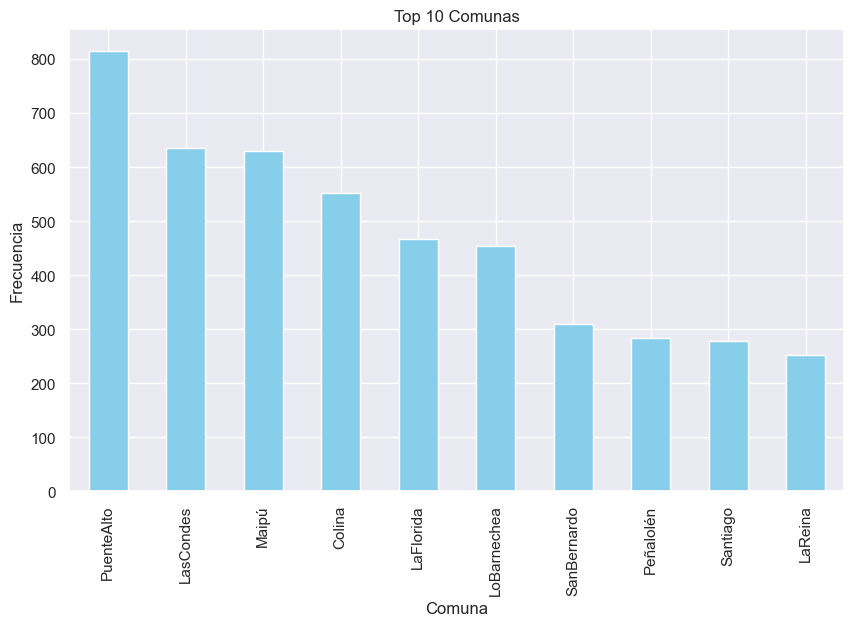

In [284]:
top_10_comunas = df["Comuna"].value_counts(ascending=False)[:10]

plt.figure(figsize=(10, 6))
top_10_comunas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Comunas')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.show()

#### Tabla de Frecuencias para el Corredor de Propiedades

In [285]:
calcular_tabla_frecuencias(df,"Realtor")

,Realtor (xi),F. Absoluta (fi),F. A. Acumulada (Fi),F. Relativa (hi),F. R. Acumulada (Hi)
0,Unne,1604,1604,0.21,0.21
1,Nexxos,597,2201,0.08,0.28
2,Easyprop,448,2649,0.06,0.34
3,Mi Llave,295,2944,0.04,0.38
4,Propiedades Centro Santiago SPA,291,3235,0.04,0.42
...,...,...,...,...,...
236,León y Santander Corrredores,1,7730,0.00,0.99
237,Giovanna Pomar,1,7731,0.00,0.99
238,Collarte & Bascuñán Propiedades,1,7732,0.00,1.00
239,Corredora Fuentes Propiedades,1,7733,0.00,1.00


Vemos que el top 5 de Corredores que acumulan la mayor cantidad de propiedades en venta es conformado por Unne, Nexxos, Easyprop, Mi Llava y Propiedades Centro Santiago SPA.

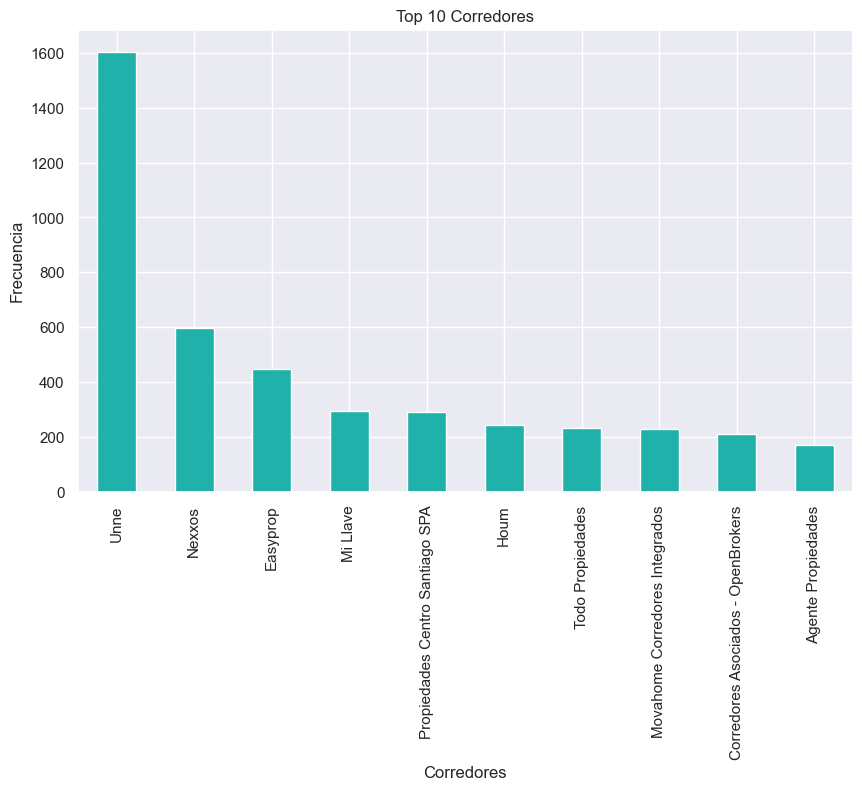

In [286]:
top_10_corredores = df["Realtor"].value_counts(ascending=False)[:10]

plt.figure(figsize=(10, 6))
top_10_corredores.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Corredores')
plt.xlabel('Corredores')
plt.ylabel('Frecuencia')
plt.show()

#### Tabla de frecuencias para Zona

Utilizando información de internet se crea una nueva columna que permite visualizar utilizando menos categorías las zonas donde hay más propiedades en venta.

In [287]:
import requests
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#:~:text=Pese%20a%20que%20no%20existe%20un%20consenso%20oficial,norte%2C%20centro%2C%20nororiente%2C%20suroriente%2C%20sur%2C%20surponiente%20y%20norponiente."

html = requests.get(url).content

df_html_list = pd.read_html(html)

In [288]:
df_zonas_satelite = df_html_list[6]
df_zonas_satelite = df_zonas_satelite[["Comuna", "Provincia"]]
df_zonas_satelite.rename(columns={"Provincia": "Ubicación"}, inplace=True)
df_zonas_satelite["Ubicación"] = "satélite"

In [289]:
df_zonas_comunas = df_html_list[5]
df_zonas_comunas.rename(columns={"Ubicación?": "Ubicación"}, inplace=True)
df_zonas_comunas = df_zonas_comunas[['Comuna', 'Ubicación']]
df_zonas_comunas = pd.concat([df_zonas_comunas, df_zonas_satelite], ignore_index=True, sort=False)
df_zonas_comunas["Comuna"] = df_zonas_comunas["Comuna"].apply(lambda x: str(x).replace(" ", ""))

In [290]:
comunas_not_founded_1 = []
for comuna in list(df["Comuna"].unique()):
    if comuna not in list(df_zonas_comunas["Comuna"].unique()):
        comunas_not_founded_1.append(comuna)

comunas_not_founded_1

['Tiltil', 'Melipilla', 'Curacaví', 'MaríaPinto', 'SanPedro']

In [291]:
comunas_not_founded_2 = []
for comuna in list(df_zonas_comunas["Comuna"].unique()):
    if comuna not in list(df["Comuna"].unique()):
        comunas_not_founded_2.append(comuna)

comunas_not_founded_2

[]

In [292]:
df_zonas_satelite_2 = pd.DataFrame({
    "Comuna": comunas_not_founded_1,
    "Ubicación": "satélite"
})

In [293]:
df_zonas_comunas = pd.concat([df_zonas_comunas, df_zonas_satelite_2], ignore_index=True, sort=False)

In [294]:
dict_comunas = dict(zip(df_zonas_comunas["Comuna"], df_zonas_comunas["Ubicación"]))

In [295]:
df["Zona"] = df["Comuna"].map(dict_comunas)

Tabla de frecuencias para Zona

In [296]:
calcular_tabla_frecuencias(df,"Zona")

,Zona (xi),F. Absoluta (fi),F. A. Acumulada (Fi),F. Relativa (hi),F. R. Acumulada (Hi)
0,nororiente,1961,1961,0.25,0.25
1,suroriente,1662,3623,0.21,0.47
2,satélite,1230,4853,0.16,0.62
3,surponiente,896,5749,0.12,0.74
4,sur,852,6601,0.11,0.85
5,norte,493,7094,0.06,0.91
6,norponiente,398,7492,0.05,0.96
7,centro,278,7770,0.04,1.00


Vemos que las zonas que tienen mayor cantidad de propiedades en venta son la zona nororiente, suroriente y las zonas satélite (fuera de la zona urbana de santiago pero dentro de la región metropolitana)

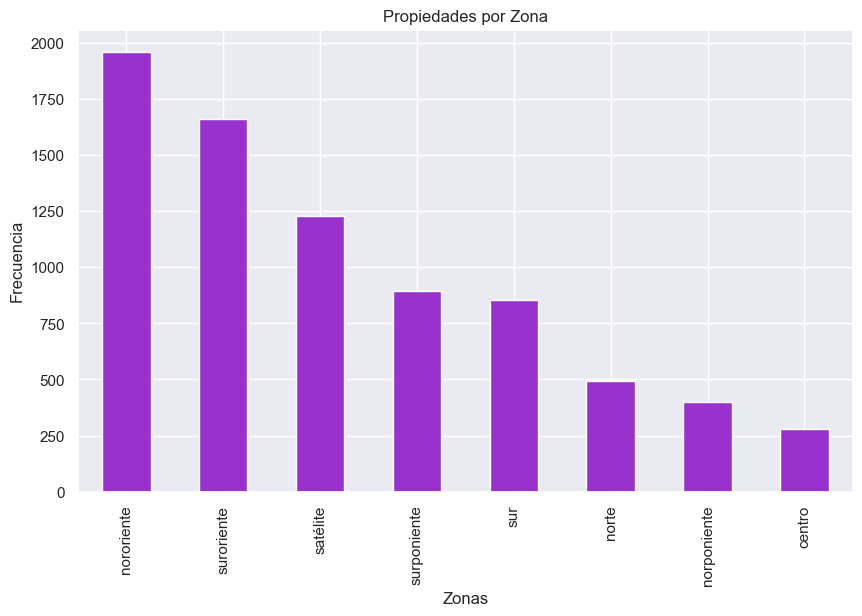

In [298]:
frecuencia_por_zona = df["Zona"].value_counts(ascending=False)

plt.figure(figsize=(10, 6))
frecuencia_por_zona.plot(kind='bar', color='darkorchid')
plt.title('Propiedades por Zona')
plt.xlabel('Zonas')
plt.ylabel('Frecuencia')
plt.show()

### Tablas Resumen